#Monitoramento das causas de estresse nos alunos de hoje

##Importando bibliotecas

In [73]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import math

##Checando os dados

In [2]:
df = pd.read_csv('C:/Users/Cliente/Desktop/vscode/Primeira análise/archive/Stress_Dataset.csv')

In [3]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [4]:
df.columns

Index(['Gender', 'Age', 'Have you recently experienced stress in your life?',
       'Have you noticed a rapid heartbeat or palpitations?',
       'Have you been dealing with anxiety or tension recently?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Have you been getting headaches more often than usual?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Have you been feeling sadness or low mood?',
       'Have you been experiencing any illness or health issues?',
       'Do you often feel lonely or isolated?',
       'Do you feel overwhelmed with your academic workload?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you find that your relationship often causes you stress?',
       'Are you facing any difficulties with your professors or instructors?',
       'Is your working env

###Dicionário de colunas

* Gender: gênero do estudante; 0 (Male), 1 (Female)
* Age: Idade numérica (18 a 21)

####Indicadores emocionais e de estresse

* Have you recently experienced stress in your life?: Você passou por algum estresse recentemente?
* Have you noticed a rapid heartbeat or palpitations?: Você notou batimentos cardíacos acelerados ou palpitações?
* Have you been dealing with anxiety or tension recently?: Você tem lidado com ansiedade ou tensão recentemente?
* Do you face any sleep problems or difficulties falling asleep?: Você enfrenta algum problema de sono ou dificuldade para dormir?
* Do you have trouble concentrating on your academic tasks?: Você tem dificuldade para se concentrar em suas tarefas acadêmicas?
* Have you been feeling sadness or low mood?: Você tem se sentido triste ou de mau humor?
* Do you get irritated easily?: Você se irrita facilmente?
* Do you often feel lonely or isolated?: Você costuma se sentir solitário ou isolado?

####Indicadores Físicos e de Saúde

* Have you been getting headaches more often than usual?: Você tem tido dores de cabeça com mais frequência do que o normal?
* Have you been experiencing any illness or health issues?: Você tem enfrentado alguma doença ou problema de saúde?
* Have you gained/lost weight?: Você ganhou/perdeu peso?
####Estressores Acadêmicos e Ambientais
* Do you feel overwhelmed with your academic workload?: Você se sente sobrecarregado com sua carga de trabalho acadêmica?
* Are you in competition with your peers, and does it affect you?: Você está competindo com seus colegas e isso afeta você?
* Do you lack confidence in your academic performance?: Você não tem confiança no seu desempenho acadêmico?
* Do you lack confidence in your choice of academic subjects?: Você não tem confiança na sua escolha de disciplinas acadêmicas?
* Academic and extracurricular activities conflicting for you?: Atividades acadêmicas e extracurriculares são conflitantes para você?
* Do you attend classes regularly?: Você frequenta as aulas regularmente?
* Are you facing any difficulties with your professors or instructors?: Você está enfrentando alguma dificuldade com seus professores ou instrutores?
* Is your working environment unpleasant or stressful?: Seu ambiente de trabalho é desagradável ou estressante?
* Is your hostel or home environment causing you difficulties?: O seu albergue ou ambiente doméstico está lhe causando dificuldades?

####Fatores sociais e de relacionamento

* Do you find that your relationship often causes you stress?: Você acha que seu relacionamento frequentemente lhe causa estresse?
* Do you struggle to find time for relaxation and leisure activities?: Você tem dificuldade em encontrar tempo para relaxamento e atividades de lazer?

####Variável de destino

* Which type of stress do you primarily experience?: Eustress, Distress, No Stress Que tipo de estresse você vivencia principalmente?: Eustresse, Angústia, Sem Estresse

###Sobre o conjunto de dados:

Este conjunto de dados coletou respostas de 843 estudantes universitários, com idades de 18 a 21 anos, sobre suas experiências com estresse, saúde, relacionamentos, desempenho acadêmico e bem-estar emocional. As respostas foram coletadas por meio do Formulários do Google, utilizando uma escala Likert de cinco pontos ("Nem um pouco" a "Extremamente") e foram feitas anonimamente para proteger a privacidade.

###Dicionário de respostas

| Faixa de avaliação original | Descrição          | Categoria simplificada |
|----------------------------|--------------------|------------------------|
| 1 – No stress at all       | Nenhum stress      | Below median (1–2)     |
| 2 – Feeling well           | Sentindo-se bem    | Below median (1–2)     |
| 3 – A little stressed      | Um pouco estressado| Median (3)            |
| 4 – Stressed               | Estressado         | Above median (4–5)     |
| 5 – Very stressed          | Muito estressado   | Above median (4–5)     |


##Análise descritiva

In [5]:
print(f'O dataset tem {df.shape[0]} linhas')
print(f'O dataset tem {df.shape[1]} colunas')

O dataset tem 843 linhas
O dataset tem 26 colunas


In [6]:
df.info(26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

Temos 25 colunas no tipo numérico e 1 coluna no tipo texto.


Não há nenhum dado nulo no dataset.

Agora vamos calcular o total de respostas de cada coluna na escala de 1-5, serão divididos em cinco tabelas para facilitar a visualização dos resultados e posterior elaboração dos gráficos com os percentuais de cada resposta.

In [25]:
# Lista das colunas que possuem respostas na escala 1–5
colunas_escala1 = ['Have you recently experienced stress in your life?', 'Have you noticed a rapid heartbeat or palpitations?',
'Have you been dealing with anxiety or tension recently?', 'Do you face any sleep problems or difficulties falling asleep?', 
'Have you been dealing with anxiety or tension recently?.1']  # ajuste conforme os nomes reais

# Contar quantas vezes cada valor (1–5) aparece em cada coluna
for coluna in colunas_escala1:
  tabela_resumo1 = df[colunas_escala1].apply(pd.Series.value_counts).sort_index()
tabela_resumo1.head()

,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1
1,78,106,193,158,177
2,219,282,247,215,250
3,263,222,217,215,180
4,193,178,124,159,152
5,90,55,62,96,84


In [58]:
colunas_escala2 = ['Have you been getting headaches more often than usual?',
'Do you get irritated easily?', 'Do you have trouble concentrating on your academic tasks?', 'Have you been feeling sadness or low mood?',
'Have you been experiencing any illness or health issues?']

for coluna in colunas_escala2:
  tabela_resumo2 = df[colunas_escala2].apply(pd.Series.value_counts).sort_index()
tabela_resumo2.head()

,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,Have you been feeling sadness or low mood?,Have you been experiencing any illness or health issues?
1,190,203,197,186,218
2,234,186,198,253,207
3,204,208,211,206,232
4,129,151,135,121,109
5,86,95,102,77,77


In [57]:
colunas_escala3 = ['Do you often feel lonely or isolated?', 'Do you feel overwhelmed with your academic workload?',
'Are you in competition with your peers, and does it affect you?', 'Do you find that your relationship often causes you stress?', 
'Are you facing any difficulties with your professors or instructors?']

for coluna in colunas_escala3:
  tabela_resumo3 = df[colunas_escala3].apply(pd.Series.value_counts).sort_index()
tabela_resumo3.head()

,Do you often feel lonely or isolated?,Do you feel overwhelmed with your academic workload?,"Are you in competition with your peers, and does it affect you?",Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?
1,232,237,207,219,216
2,222,198,262,223,252
3,194,216,202,222,221
4,128,130,102,106,90
5,67,62,70,73,64


In [56]:
colunas_escala4 = ['Is your working environment unpleasant or stressful?', 
'Do you struggle to find time for relaxation and leisure activities?', 'Is your hostel or home environment causing you difficulties?', 
'Do you lack confidence in your academic performance?', 'Do you lack confidence in your choice of academic subjects?']

for coluna in colunas_escala4:
  tabela_resumo4 = df[colunas_escala4].apply(pd.Series.value_counts).sort_index()
tabela_resumo4.head()

,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?
1,206,220,242,220,205
2,249,224,247,200,209
3,219,215,182,225,211
4,108,111,98,109,119
5,61,73,74,89,99


In [55]:
colunas_escala5 = ['Academic and extracurricular activities conflicting for you?',
'Do you attend classes regularly?', 'Have you gained/lost weight?']

for coluna in colunas_escala5:
  tabela_resumo5 = df[colunas_escala5].apply(pd.Series.value_counts).sort_index()
tabela_resumo5.head()

,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
1,157,85,194
2,234,135,300
3,203,238,213
4,155,247,91
5,94,138,45


Podemos observar esses valores no formato percentual em gráficos de barras para uma melhor análise.

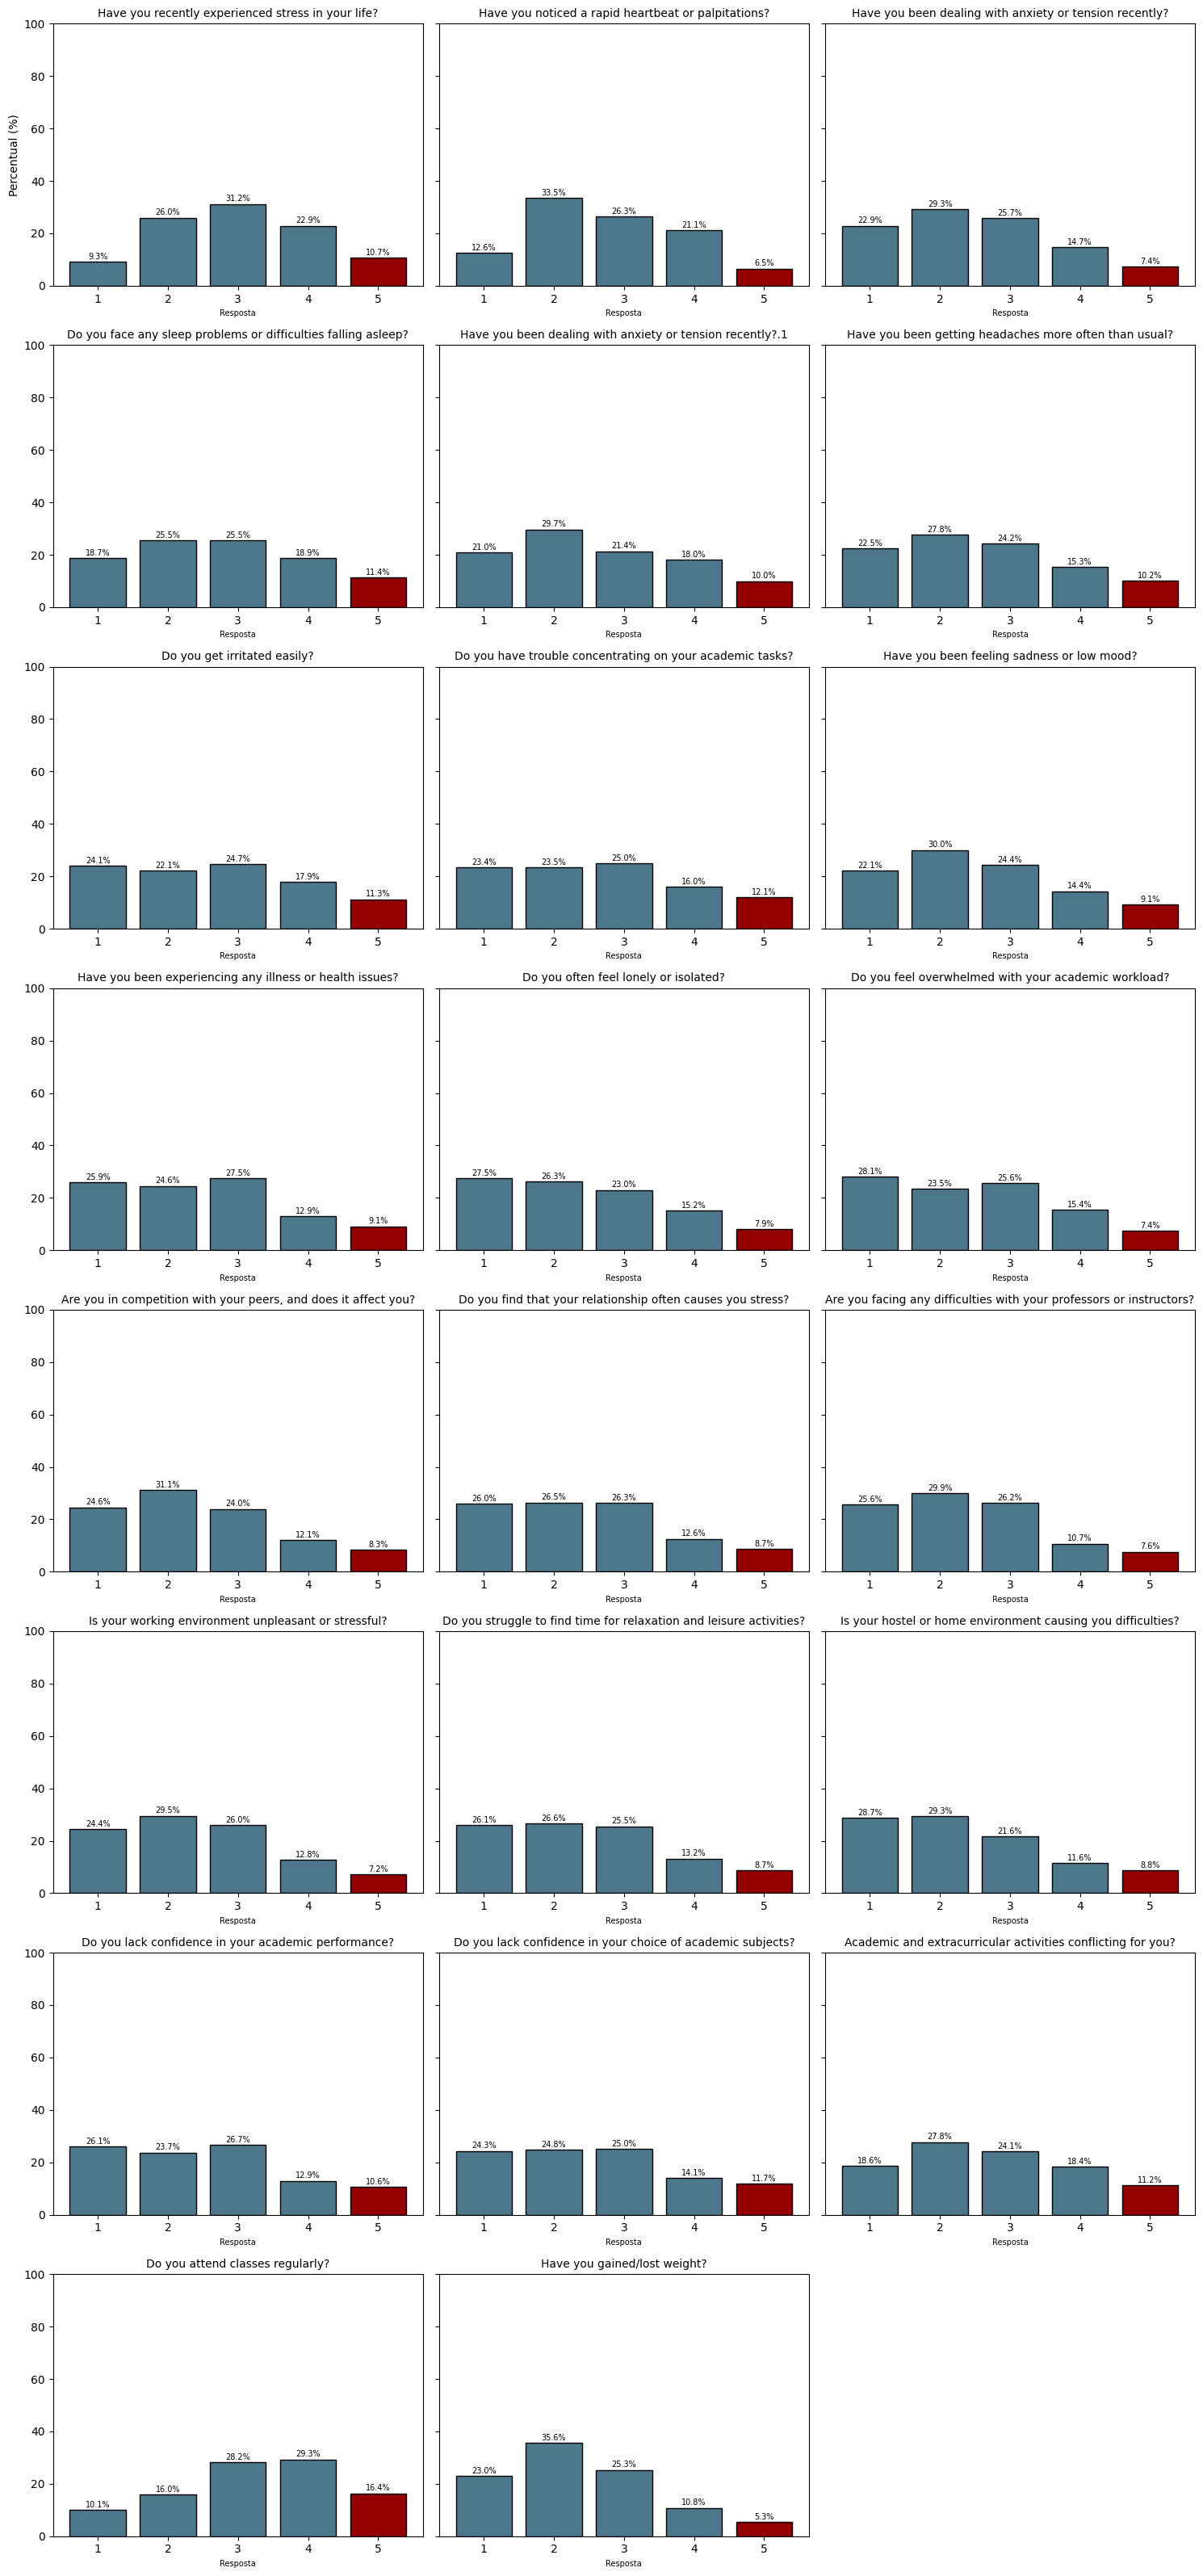

In [91]:
# Copiar o DataFrame original
df2 = df.copy()

# Lista de colunas a serem analisadas
variaveis = [
    "Have you recently experienced stress in your life?",
    "Have you noticed a rapid heartbeat or palpitations?",
    "Have you been dealing with anxiety or tension recently?",
    "Do you face any sleep problems or difficulties falling asleep?",
    "Have you been dealing with anxiety or tension recently?.1", 'Have you been getting headaches more often than usual?',
'Do you get irritated easily?', 'Do you have trouble concentrating on your academic tasks?', 'Have you been feeling sadness or low mood?',
'Have you been experiencing any illness or health issues?','Do you often feel lonely or isolated?', 'Do you feel overwhelmed with your academic workload?',
'Are you in competition with your peers, and does it affect you?', 'Do you find that your relationship often causes you stress?', 
'Are you facing any difficulties with your professors or instructors?','Is your working environment unpleasant or stressful?', 
'Do you struggle to find time for relaxation and leisure activities?', 'Is your hostel or home environment causing you difficulties?', 
'Do you lack confidence in your academic performance?', 'Do you lack confidence in your choice of academic subjects?', 'Academic and extracurricular activities conflicting for you?',
'Do you attend classes regularly?', 'Have you gained/lost weight?'  
]

# Definir layout: 3 gráficos por linha
num_graficos = len(variaveis)
colunas_por_linha = 3
linhas = math.ceil(num_graficos / colunas_por_linha)

# Criar figura com múltiplas linhas e colunas de subplots
fig, axes = plt.subplots(linhas, colunas_por_linha, figsize=(15, linhas * 4), sharey=True)
axes = axes.flatten()  # Transformar matriz de eixos em lista

for ax, coluna in zip(axes, variaveis):
    # Calcular percentuais por resposta (1 a 5)
    valores = df2[coluna].value_counts(normalize=True).sort_index() * 100
    
    # Definir cores: azul padrão, resposta 5 em vermelho
    cores = ['#4d778b' if i != 5 else '#920000' for i in valores.index]
    
    # Plotar barras
    ax.bar(valores.index, valores.values, color=cores, edgecolor='black')
    
    # Personalização do gráfico
    ax.set_title(coluna, fontsize=10)
    ax.set_xticks([1,2,3,4,5])
    ax.set_ylim(0, 100)
    ax.set_xlabel('Resposta', fontsize=7)
    
    # Adicionar percentuais acima das barras
    for i, v in zip(valores.index, valores.values):
        ax.text(i, v+1, f"{v:.1f}%", ha='center', fontsize=7)

# Remover gráficos extras vazios (se houver)
for i in range(len(variaveis), len(axes)):
    fig.delaxes(axes[i])

# Y-label apenas no primeiro gráfico
axes[0].set_ylabel('Percentual (%)')

plt.tight_layout()
plt.show()

Nos gráficos damos destaque para o percentual de respostas, que na maior parte das questões foi abaixo de 10%